<a href="https://colab.research.google.com/github/gonzalezzayra/METODOS/blob/main/Hermite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

f(w)		 1er dif.   2da dif.	 3ra dif.  4ta dif.	 5ta dif.
[[ 0.620086    0.          0.          0.          0.          0.        ]
 [ 0.620086   -0.522032    0.          0.          0.          0.        ]
 [ 0.4554022  -0.548946   -0.08971333  0.          0.          0.        ]
 [ 0.4554022  -0.5698959  -0.069833    0.06626778  0.          0.        ]
 [ 0.2818186  -0.578612   -0.02905367  0.06796556  0.00282963  0.        ]
 [ 0.2818186  -0.5811571  -0.00848367  0.06856667  0.00100185 -0.0030463 ]]
El valor interpolado de 1.5 es:  0.5118276148148149
El polinomio es :
P(x)= -0.00304629629626198*x**5 + 0.0262861111108429*x**4 - 0.022006203702871*x**3 - 0.222964342593877*x**2 - 0.0182529666656824*x + 1.00520714814785


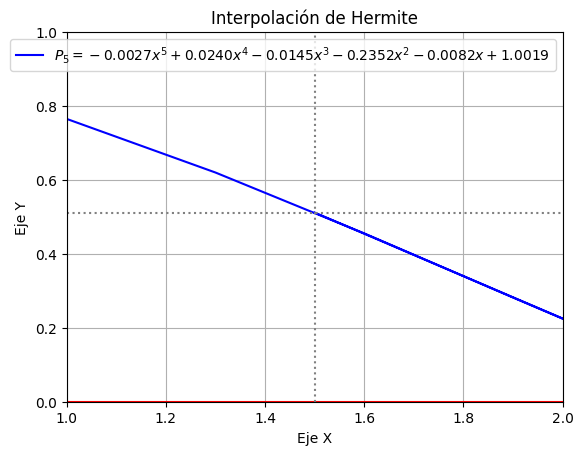

In [22]:
from math import *
import sympy as smp
import numpy as np
import matplotlib . pyplot as plt

#Los valores de los arreglos

x=np.array([1.3,1.6,1.9])
y=np.array([0.6200860,0.4554022,0.2818186])
dy=np.array([-0.522032,-0.5698959,-0.5811571])
n=(x.size)

#Ahora guardamos los valores

z=np.zeros((2*n,2*n))
w=np.zeros(2*n)

#El valor a interpolar
xj=1.5
H=z[0,0]

#Para realizar la tabla donde se vean las diferencias
for j in range(0,n):
  w[2*j]=x[j]
  w[2*j+1]=x[j]
  z[2*j,0]=y[j]
  z[2*j+1,0]=y[j]
  z[2*j+1,1]=dy[j]
  if j !=0:
    z[2*j,1]=(z[2*j,0]-z[2*j-1,0])/(w[2*j]-w[2*j-1])

for j in range(2,2*n):
  for k in range(2,j+1):
    z[j,k]=(z[j,k-1]-z[j-1,k-1])/(w[j]-w[j-k])
print("f(w)\t\t 1er dif.   2da dif.\t 3ra dif.  4ta dif.\t 5ta dif.")
print(z)



m=w.size
x0=1
H=z[0,0]
for l in range (1,m) :
  x0= x0*( xj- w[l-1])
  H= H +z[l,l] * x0

print ("El valor interpolado de",xj,"es: ", H)


#Obtención del polinomio
m=w.size
x0=1
F=z[0,0]
s = smp.Symbol('x')
for l in range (1,m) :
  x0= x0*( s - w[l-1])
  F= F +z[l,l] * x0

p=F.expand()
print("El polinomio es :")
print("P(x)=",p)


#Para sustituir el valor a interpolar
#Para graficar
#Los valores que dimos para 'x' y 'y'
x = np.array ([1.0,1.3 ,1.6 ,1.9 ,2.2])
y = np.array ([0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623])
a=np.append(x,xj)
b=np.append(y,H)
plt.plot(a,b,color="blue",label=r'$P_5=-0.0027x^5+0.0240x^4-0.0145x^3-0.2352x^2-0.0082x+1.0019$')
plt.legend(loc = 'upper right')
plt.axhline(0, color="red")
plt.axvline(0, color="red")
plt.axvline(1.5, color="grey", linestyle='dotted')
plt.axhline(0.5118200, color="grey", linestyle='dotted')
plt.xlim(1,2) #vamos dando valores para saber donde se aprecia
plt.ylim(0, 1)
plt.title("Interpolación de Hermite")
plt.grid()
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
# Mostramos el grafico
plt.show()




